<a href="https://colab.research.google.com/github/mehekakkhan/AIinIndustry_MehekKhan/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.api import qqplot

In [4]:

dta= pd.read_csv("sunspots.csv")
dta.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [5]:
dta.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [6]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [7]:
dta

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
...,...,...
304,2004,40.4
305,2005,29.8
306,2006,15.2
307,2007,7.5


# Preparing the Data

Next we need to do a little dataset preparation. Here, an annual date series must be date-times at the end of the year.

In [8]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [9]:
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


# Examine the Data

Now we take a look at the data.

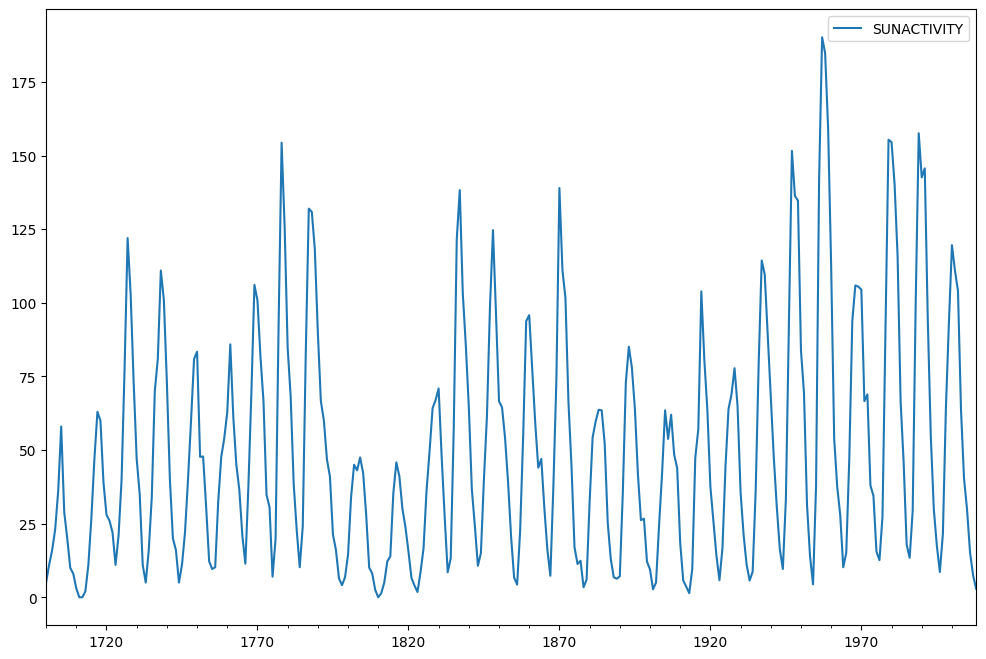

In [10]:

# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [11]:
sm.stats.durbin_watson(dta) ## to check autocorreation

array([0.13952893])

The value of Durbin-Watson statistic is close to 2 if the data are uncorrelated. In our example, it is 0.1395. That means that there is a strong evidence that the variable open has high autocorrelation.

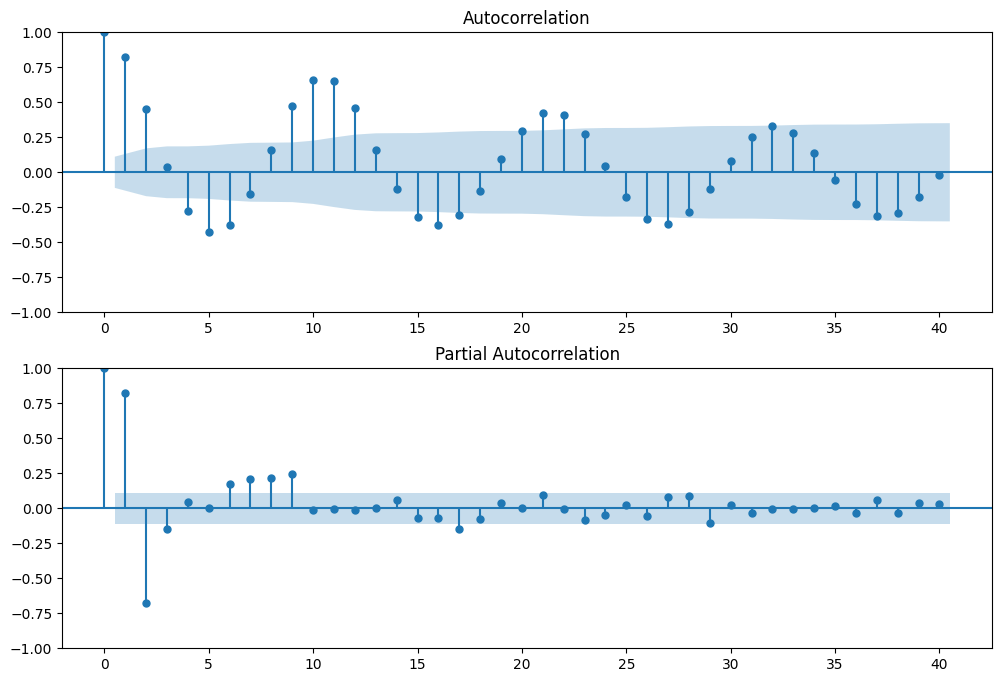

In [12]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

For mixed ARMA processes the Autocorrelation function is a mixture of exponentials and damped sine waves after (q-p) lags. The partial autocorrelation function is a mixture of exponentials and dampened sine waves after (p-q) lags.

# Modeling the Data

In [13]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Sun, 15 Oct 2023   AIC                           2622.637
Time:                        14:36:52   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.0

We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [14]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6370933008184 2637.570458408409 2628.6074811460644


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [15]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.1456895552178477

 The Durbin-Watson test shows no autocorrelation.


## Plotting the Data

Next we plot and study the data it represents.



## Predictions

Next, we compute the predictions and analyze their fit against actual values.

In [16]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=False)
print(predict_sunspots20)

1990-12-31    164.990118
1991-12-31    104.606541
1992-12-31    119.246096
1993-12-31     45.632991
1994-12-31     25.817514
1995-12-31     18.805226
1996-12-31     18.569130
1997-12-31     14.730801
1998-12-31     38.798264
1999-12-31     89.434760
2000-12-31    100.292192
2001-12-31    116.897222
2002-12-31     86.828313
2003-12-31     83.015610
2004-12-31     31.793116
2005-12-31     27.140858
2006-12-31     28.443898
2007-12-31     15.439531
2008-12-31     14.784823
2009-12-31     13.689923
2010-12-31     31.862180
2011-12-31     49.703468
2012-12-31     62.001227
Freq: A-DEC, Name: predicted_mean, dtype: float64


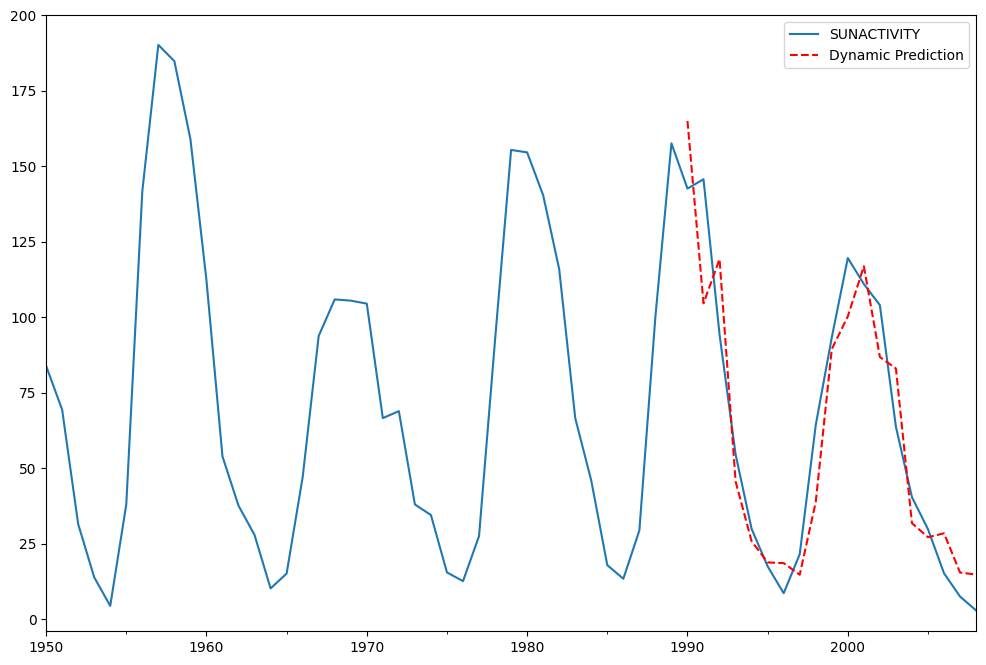

In [17]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

The fit looks good up to about 1998 and underfit the data afterwards.

## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [18]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [19]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  1.112262974254929
MAE =  0.03458426615388609


For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit.


## Auto Arima

In [20]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.5 MB/s eta 0:00:00


In [33]:
import pmdarima as pm

df = pd.read_csv('sunspots.csv', header=0)
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del df["YEAR"]

model = pm.auto_arima(df.SUNACTIVITY, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series here annual
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Using Seasonality
                      start_P=0,
                      D=1,            #Indicating Seasonal differencing
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3060.055, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2785.501, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3058.458, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2806.511, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2784.184, Time=2.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.38 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3056.960, Time=2.29 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2621.982, Time=4.85 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2640.354, Time=1.13 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.47 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.71 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=2618.8

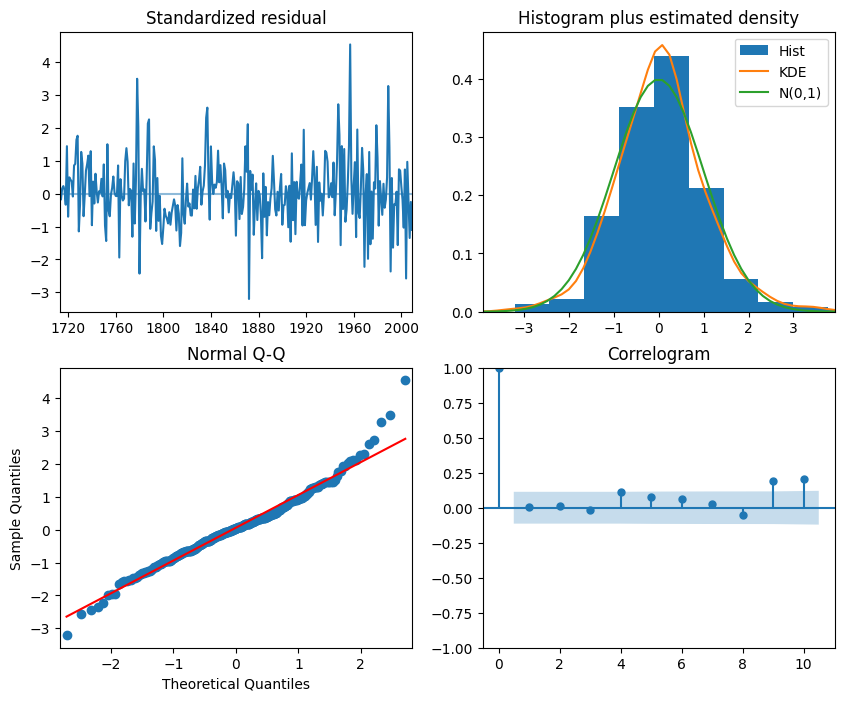

In [28]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [29]:
import statsmodels.api as sm
model =sm.tsa.SARIMAX(dta, order=(3, 0, 2), seasonal_order=(1,1,1,12)).fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 12)   Log Likelihood               -1272.090
Date:                              Sun, 15 Oct 2023   AIC                           2560.180
Time:                                      14:48:52   BIC                           2589.730
Sample:                                  12-31-1700   HQIC                          2572.010
                                       - 12-31-2008                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7678      0.395      1.943      0.052      -0.007       1.542
ar.L2          0.16

In [30]:
print(model.aic,model.bic, model.hqic)   # errors reduced

2560.1799967135225 2589.7298538239443 2572.009851834133


In [31]:
predict_sunspots20 = model.predict('1990', '2012', dynamic=False)
print(predict_sunspots20)

1990-12-31    175.014664
1991-12-31    114.482765
1992-12-31    111.656544
1993-12-31     54.299223
1994-12-31     22.074892
1995-12-31     18.446682
1996-12-31     21.989242
1997-12-31     12.502489
1998-12-31     33.252004
1999-12-31     86.038149
2000-12-31    111.449865
2001-12-31    120.403013
2002-12-31     85.016035
2003-12-31     89.756415
2004-12-31     33.277627
2005-12-31     25.381325
2006-12-31     29.975194
2007-12-31     16.175849
2008-12-31     14.306148
2009-12-31     14.413712
2010-12-31     33.682817
2011-12-31     50.463238
2012-12-31     67.151920
Freq: A-DEC, Name: predicted_mean, dtype: float64


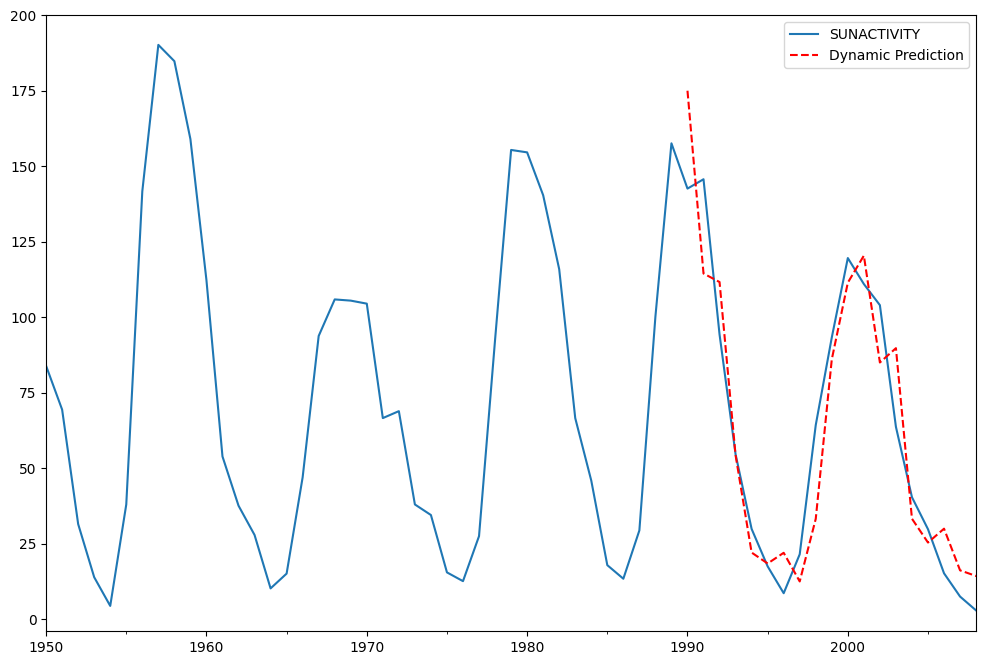

In [32]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));